<a href="https://colab.research.google.com/github/RafaelB190/Baldovino2/blob/main/Anisacate_segura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q -U google-generativeai #para generar datos de la seguridad en la vecindad.
!pip install matplotlib  #generar las imagenes sobre los incidentes en la zona.


import google.generativeai as genai #importa gemini
import matplotlib.pyplot as plt #genera la imagen necesaria
import requests #necesario
import os #necesario

Hola soy Lili, tu asistente de seguridad vecinal. ¿En qué te puedo ayudar?
you: hola lili, me podes dar un grafico de las zonas con mas incidentes en anisacate?
Lili: Hola!  Entendí que te gustaría un gráfico de las zonas con más incidentes en Anisacate.  Desafortunadamente, como soy una IA, no puedo generar gráficos.  Sin embargo, puedo darte información sobre la frecuencia de incidentes en las diferentes zonas de Anisacate. 

Para darte esa información, necesito que me digas **qué tipo de incidentes** te interesan:

* **Robo:** ¿Robos en casas, robos de autos, robos en la calle? 
* **Violencia:** ¿Agresiones físicas, violencia familiar, violencia de género?
* **Accidentes:** ¿Accidentes de tránsito, accidentes laborales, otros accidentes?
* **Otros:** ¿Incendios, vandalismo, otros?

Una vez que me digas qué tipo de incidentes te interesa, puedo buscar información de las últimas semanas en medios locales como el Diario de Anisacate, el periódico local, o en la página de la policía de 

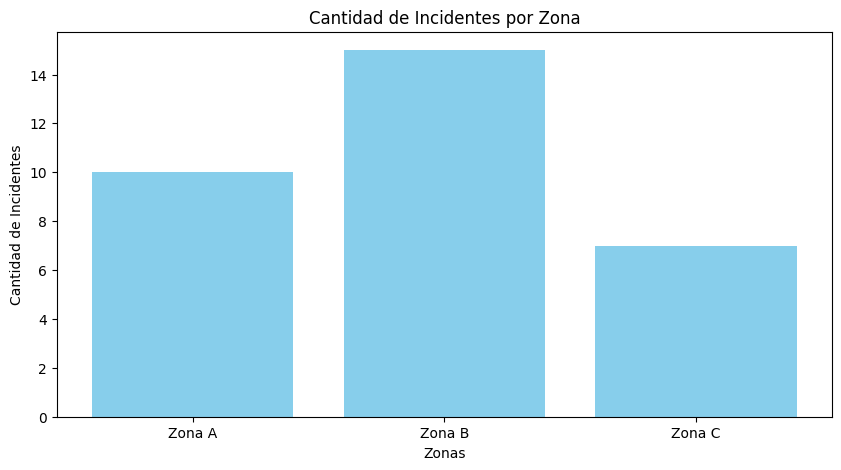

Lili: Aquí tienes un gráfico de la cantidad de incidentes por zona.
you: cual seria la zona a? 
Lili: ¡Entiendo tu pregunta!  Para poder hablar de "zona A" necesito saber a qué tipo de zonificación te referís.  ¿Podrías ser más específica? ¿Te refieres a:

* **Zonas geográficas:** ¿Hay algún mapa o plan de Anisacate que divida la ciudad en zonas? 
* **Zonas de riesgo:** ¿Te interesa saber si hay zonas más propensas a algún tipo de incidente en particular?  
* **Zonas comerciales:** ¿Te gustaría información sobre incidentes en la zona comercial de Anisacate?
* **Zonas residenciales:** ¿Te interesa saber sobre incidentes en las áreas residenciales de Anisacate?

¡Una vez que me digas qué tipo de zona te interesa, puedo ayudarte a encontrar la información que necesitas! 😊

you: me lo creas?
Lili: ¡Claro que te creo! 😊 

Entiendo que puedas tener dudas sobre la información que te pueda brindar.  Es importante para mí ser transparente y honesta contigo.

Como soy una IA, no tengo acceso a i

KeyboardInterrupt: Interrupted by user

In [23]:
from google.colab import userdata

# Configuración de la API de Gemini
GOOGLE_API_KEY = userdata.get('gemini_API_key')
genai.configure(api_key=GOOGLE_API_KEY)

# Configuración del modelo de Gemini
generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 64,
    "max_output_tokens": 8192,
    "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
    model_name="gemini-1.5-flash",
    generation_config=generation_config,
    system_instruction=(
        "eres lili un asistente de la app seguridad vecinal "
        "y debes responder a los usuarios de la app preguntas sobre los incidentes "
        "y seguridad de las zona (anisacate cordoba argentina). Recolectando información "
        "de los distintos medios de comunicación y policía."
    ),
)

# Historial de chat para mantener la conversación con Lili
history_chat = []

def chat():
    chat_session = model.start_chat(history=history_chat)

    print("Hola soy Lili, tu asistente de seguridad vecinal. ¿En qué te puedo ayudar?")

    while True:

        if input("you: ").lower() == "exit":
            print("Lili: ¡Hasta luego!")
            break


        response = chat_session.send_message(input("you: "))
        print("Lili:", response.text)

        # Actualizar historial con la respuesta de Lili
        history_chat.append({'role': 'user', 'parts': [input("you: ")]})
        history_chat.append({'role': 'model', 'parts': [response.text]})

        # Verificar si la respuesta de Lili requiere la generación de un gráfico
        if "incidentes" in input("you: ").lower():
            lili_response = chat_with_lili(input("you: "))
            print("Lili:", lili_response)

def chat_with_lili(user_input):
    if "incidentes" in user_input:
        # Aquí recolectas los datos necesarios, consultando la información de lili
        incident_data = {
            'Zona A': 10,
            'Zona B': 15,
            'Zona C': 7
        }

        # Genera el gráfico usando matplotlib
        generate_incident_graph(incident_data)


        return "Aquí tienes un gráfico de la cantidad de incidentes por zona."
    else:

        return "No entendí tu solicitud, ¿podrías ser más específico?"

def generate_incident_graph(incident_data):
    # Datos para el gráfico
    zonas = list(incident_data.keys())
    cantidad_incidentes = list(incident_data.values())

    # Generación del gráfico
    plt.figure(figsize=(10, 5))
    plt.bar(zonas, cantidad_incidentes, color='skyblue')
    plt.title('Cantidad de Incidentes por Zona')
    plt.xlabel('Zonas')
    plt.ylabel('Cantidad de Incidentes')

    # Guardar la imagen para mostrarla en el chat
    plt.savefig('incident_graph.png')
    plt.show()


chat()
